# Exploración de datos Armadillo

In [132]:
import pandas as pd

## Load Data

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
path_2017 = "/content/drive/My Drive/Taller_diseño_proyecto/data armadillo/2017-19-06.xlsx"
path_2018 = "/content/drive/My Drive/Taller_diseño_proyecto/data armadillo/2018-19-06.xlsx"
path_2019 = "/content/drive/My Drive/Taller_diseño_proyecto/data armadillo/2019-25-06.xlsx"
path_2020 = "/content/drive/My Drive/Taller_diseño_proyecto/data armadillo/2020-15-07.xlsx"

In [135]:
df_2017 = pd.read_excel(path_2017)
df_2017.dropna(inplace=True)
df_2017.shape

(727, 47)

In [136]:
df_2018 = pd.read_excel(path_2018)
df_2018.dropna(inplace=True)
df_2018.shape

(813, 11)

In [137]:
df_2019 = pd.read_excel(path_2019)
# df_2019.dropna(inplace=True)
df_2019.shape

(884, 45)

In [138]:
df_2020 = pd.read_excel(path_2020)
# df_2020.dropna(inplace=True)
df_2020.shape

(890, 41)

Para poder subir esto se eliminan los datos identificadores únicos.

In [139]:
df_2017.drop(columns=['Nombre', 'Rut'], inplace=True)
df_2018.drop(columns=['NOMBRE', 'RUT'], inplace=True)
df_2019.drop(columns=['NOMBRE', 'RUT'], inplace=True)
df_2020.drop(columns=['NOMBRE', 'RUT'], inplace=True)

Claramente hay un desbalance de que columnas en los distintos datasets, por lo que se debe ver qué columnas mantener.

In [140]:
print('columns in 2017:', df_2017.columns)
print('columns in 2018:', df_2018.columns)
print('columns in 2019:', df_2019.columns)
print('columns in 2020:', df_2020.columns)

columns in 2017: Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'Puntaje Total', 'Porcentaje Total', 'Nivel de Logro', 'Tipo Estab.',
       'Establecimiento', 'NEM', 'Pje. Lenguaje', 'Tipo Ingreso', 'Región',
       'Manejo de Conectores', 'Plan de Redacción', 'Recuperar', 'Analizar',
       'Evaluar', 'Distribución'],
      dtype='object')
columns in 2018: Index(['Nº', 'RESPUESTAS CORRECTAS', 'PORCENTAJE DE LOGRO', 'NIVEL DE LOGRO',
       'VIA DE INGRESO', 'TIPO DE ESTABLECIMIENTO', 'REGIÓN', 'PSU LENGUAJE',
       'NEM'],
      dtype='object')
columns in 2019: Index(['Nº', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'PTJE TOTAL'

## Clean data

In [141]:
# P1 - P30
questions = []
for i in range(30):
  q = f'P{i+1}'
  questions.append(q)

In [142]:
df_2017.drop(columns=questions, inplace=True)
df_2019.drop(columns=questions, inplace=True)
df_2020.drop(columns=questions, inplace=True)

In [143]:
print('columns in 2017:', df_2017.columns)
print('columns in 2018:', df_2018.columns)
print('columns in 2019:', df_2019.columns)
print('columns in 2020:', df_2020.columns)

columns in 2017: Index(['Puntaje Total', 'Porcentaje Total', 'Nivel de Logro', 'Tipo Estab.',
       'Establecimiento', 'NEM', 'Pje. Lenguaje', 'Tipo Ingreso', 'Región',
       'Manejo de Conectores', 'Plan de Redacción', 'Recuperar', 'Analizar',
       'Evaluar', 'Distribución'],
      dtype='object')
columns in 2018: Index(['Nº', 'RESPUESTAS CORRECTAS', 'PORCENTAJE DE LOGRO', 'NIVEL DE LOGRO',
       'VIA DE INGRESO', 'TIPO DE ESTABLECIMIENTO', 'REGIÓN', 'PSU LENGUAJE',
       'NEM'],
      dtype='object')
columns in 2019: Index(['Nº', 'PTJE TOTAL', 'PORCENTAJE DE LOGRO', 'NIVEL DE LOGRO',
       'VIA DE INGRESO', 'TIPO DE ESTABLECIMIENTO', 'PSU LENGUAJE', 'NEM',
       'Manejo de Conectores', 'Plan de Redacción', 'Recuperar', 'Analizar',
       'Evaluar'],
      dtype='object')
columns in 2020: Index(['Nº', 'PTJE TOTAL', 'PORCENTAJE DE LOGRO', 'NIVEL DE LOGRO',
       'Manejo de Conectores', 'Plan de Redacción', 'Recuperar', 'Analizar',
       'Evaluar'],
      dtype='object')


Como no sabemos qué significan las columnas 'Manejo de Conectores', 'Plan de Redacción', 'Recuperar', 'Analizar', 'Evaluar', 'Distribución' por mientras se van a borrar. principalmente porque creemos que tiene que ver con el desempeño, que en su finalidad es lo que queremos predecir. Además, se borrará el identificador 'Nº'

Existen variables que muestran el desempeño, a priori se usará el porcentaje de logro para medirlo. Por esto se borran las variables 'Puntaje Total', 'Nivel de Logro', 'PTJE TOTAL', 'NIVEL DE LOGRO'.

In [144]:
unknown_columns_2017 = ['Manejo de Conectores', 'Plan de Redacción', 'Recuperar', 
                'Analizar', 'Evaluar']
eval_extra_2017 = ['Puntaje Total', 'Nivel de Logro']

unknown_columns = ['Nº']
eval_extra = ['PTJE TOTAL', 'NIVEL DE LOGRO']

df_2017.drop(columns=[*unknown_columns_2017, *eval_extra_2017,'Distribución'], inplace=True)
df_2018.drop(columns=[*unknown_columns, 'RESPUESTAS CORRECTAS', 'NIVEL DE LOGRO'], inplace=True)
df_2019.drop(columns=[*unknown_columns, *eval_extra, *unknown_columns_2017], inplace=True)
df_2020.drop(columns=[*unknown_columns, *eval_extra, *unknown_columns_2017], inplace=True)

print('columns in 2017:', df_2017.columns)
print('columns in 2018:', df_2018.columns)
print('columns in 2019:', df_2019.columns)
print('columns in 2020:', df_2020.columns)

columns in 2017: Index(['Porcentaje Total', 'Tipo Estab.', 'Establecimiento', 'NEM',
       'Pje. Lenguaje', 'Tipo Ingreso', 'Región'],
      dtype='object')
columns in 2018: Index(['PORCENTAJE DE LOGRO', 'VIA DE INGRESO', 'TIPO DE ESTABLECIMIENTO',
       'REGIÓN', 'PSU LENGUAJE', 'NEM'],
      dtype='object')
columns in 2019: Index(['PORCENTAJE DE LOGRO', 'VIA DE INGRESO', 'TIPO DE ESTABLECIMIENTO',
       'PSU LENGUAJE', 'NEM'],
      dtype='object')
columns in 2020: Index(['PORCENTAJE DE LOGRO'], dtype='object')


In [145]:
print(df_2017.isna().sum())
print(df_2018.isna().sum())
print(df_2019.isna().sum())
print(df_2020.isna().sum())

Porcentaje Total    0
Tipo Estab.         0
Establecimiento     0
NEM                 0
Pje. Lenguaje       0
Tipo Ingreso        0
Región              0
dtype: int64
PORCENTAJE DE LOGRO        0
VIA DE INGRESO             0
TIPO DE ESTABLECIMIENTO    0
REGIÓN                     0
PSU LENGUAJE               0
NEM                        0
dtype: int64
PORCENTAJE DE LOGRO          0
VIA DE INGRESO             191
TIPO DE ESTABLECIMIENTO    203
PSU LENGUAJE               192
NEM                        192
dtype: int64
PORCENTAJE DE LOGRO    0
dtype: int64


Claramente, los resultados del 2020 no se pueden usar para entrenar ya que no se cuenta con los atributos de los estudiantes. De esta forma solo se pueden usar los datos desde 2017 hasta el 2019. Por otra parte, en el año 2019 existe una gran cantidad de estudiantes que tienen NaN en algunos de sus atributos. Estos de forma preliminar será eliminados, pero luego se pueden rellenar sus datos.

In [146]:
df_2019.dropna(inplace=True)

In [147]:
df_2019.shape
df_2017.drop(columns='Establecimiento', inplace=True)

### Concatenar los datasets

In [148]:
dict_names = {'Porcentaje Total': 'PORCENTAJE DE LOGRO', 'Tipo Estab.': 'TIPO DE ESTABLECIMIENTO',
              'Pje. Lenguaje': 'PSU LENGUAJE', 'Tipo Ingreso': 'VIA DE INGRESO'}

df_2017.drop(columns='Región', inplace=True)
df_2018.drop(columns='REGIÓN', inplace=True)

In [149]:
df_2017.rename(columns=dict_names, inplace=True)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['PORCENTAJE DE LOGRO', 'TIPO DE ESTABLECIMIENTO', 'NEM', 'PSU LENGUAJE',
       'VIA DE INGRESO'],
      dtype='object')
Index(['PORCENTAJE DE LOGRO', 'VIA DE INGRESO', 'TIPO DE ESTABLECIMIENTO',
       'PSU LENGUAJE', 'NEM'],
      dtype='object')
Index(['PORCENTAJE DE LOGRO', 'VIA DE INGRESO', 'TIPO DE ESTABLECIMIENTO',
       'PSU LENGUAJE', 'NEM'],
      dtype='object')


In [150]:
# concatenate

dfs = [df_2017, df_2018, df_2019]

df = pd.concat(dfs)

In [151]:
df.head()

,PORCENTAJE DE LOGRO,TIPO DE ESTABLECIMIENTO,NEM,PSU LENGUAJE,VIA DE INGRESO
1,0.312500,Subvencionado,678,612,PAA o PSU
2,0.312500,Municipal,635,684,PAA o PSU
3,0.333333,Subvencionado,557,729,Bachillerato
5,0.375000,Particular,643,660,PAA o PSU
7,0.437500,Particular,702,626,Bachillerato


In [152]:
df['VIA DE INGRESO'].unique()

array(['PAA o PSU', 'Bachillerato', '5% Colegios Municipalizados',
       'Equidad de Genero', 'SIPEE', 'Deportista', 'PSU',
       'EQUIDAD DE GÉNERO', 'S/I', 'DEPORTISTA DESTACADO', 'EDT',
       'BEA (BECA EXCELENCIA ACADÉMICA)', 'PACE',
       'Bea (Beca Excelencia Académica)', 'Sipee', 'Deportista Destacado',
       'Equidad de Género'], dtype=object)

In [153]:
df.loc[df['VIA DE INGRESO'] == 'PSU', 'VIA DE INGRESO'] = 'PAA o PSU'
df.loc[df['VIA DE INGRESO'] == 'Deportista', 'VIA DE INGRESO'] = 'DEPORTISTA DESTACADO'
df.loc[df['VIA DE INGRESO'] == 'Deportista Destacado', 'VIA DE INGRESO'] = 'DEPORTISTA DESTACADO'
df.loc[df['VIA DE INGRESO'] == 'Bea (Beca Excelencia Académica)', 'VIA DE INGRESO'] = 'BEA (BECA EXCELENCIA ACADÉMICA)'
df.loc[df['VIA DE INGRESO'] == 'Sipee', 'VIA DE INGRESO'] = 'SIPEE'
df.loc[df['VIA DE INGRESO'] == 'Equidad de Género', 'VIA DE INGRESO'] = 'EQUIDAD DE GÉNERO'
df.loc[df['VIA DE INGRESO'] == 'Equidad de Genero', 'VIA DE INGRESO'] = 'EQUIDAD DE GÉNERO'

In [154]:
df['VIA DE INGRESO'].unique()

array(['PAA o PSU', 'Bachillerato', '5% Colegios Municipalizados',
       'EQUIDAD DE GÉNERO', 'SIPEE', 'DEPORTISTA DESTACADO', 'S/I', 'EDT',
       'BEA (BECA EXCELENCIA ACADÉMICA)', 'PACE'], dtype=object)

In [155]:
df['TIPO DE ESTABLECIMIENTO'].unique()

array(['Subvencionado', 'Municipal', 'Particular', 'HC DIURNO',
       'HC NOCTURNO', 'TP INDUSTRIAL', 'TP COMERCIAL', 'Extranjero'],
      dtype=object)

In [156]:
df['VIA DE INGRESO'] = df['VIA DE INGRESO'].astype('category')
df['TIPO DE ESTABLECIMIENTO'] = df['TIPO DE ESTABLECIMIENTO'].astype('category')

In [157]:
df.head()

,PORCENTAJE DE LOGRO,TIPO DE ESTABLECIMIENTO,NEM,PSU LENGUAJE,VIA DE INGRESO
1,0.312500,Subvencionado,678,612,PAA o PSU
2,0.312500,Municipal,635,684,PAA o PSU
3,0.333333,Subvencionado,557,729,Bachillerato
5,0.375000,Particular,643,660,PAA o PSU
7,0.437500,Particular,702,626,Bachillerato


In [158]:
print(dict(enumerate(df['VIA DE INGRESO'].cat.categories)))
print(dict(enumerate(df['TIPO DE ESTABLECIMIENTO'].cat.categories)))

{0: '5% Colegios Municipalizados', 1: 'BEA (BECA EXCELENCIA ACADÉMICA)', 2: 'Bachillerato', 3: 'DEPORTISTA DESTACADO', 4: 'EDT', 5: 'EQUIDAD DE GÉNERO', 6: 'PAA o PSU', 7: 'PACE', 8: 'S/I', 9: 'SIPEE'}
{0: 'Extranjero', 1: 'HC DIURNO', 2: 'HC NOCTURNO', 3: 'Municipal', 4: 'Particular', 5: 'Subvencionado', 6: 'TP COMERCIAL', 7: 'TP INDUSTRIAL'}


In [159]:
df['VIA DE INGRESO'] = df['VIA DE INGRESO'].cat.codes
df['TIPO DE ESTABLECIMIENTO'] = df['TIPO DE ESTABLECIMIENTO'].cat.codes

In [160]:
df.head()

,PORCENTAJE DE LOGRO,TIPO DE ESTABLECIMIENTO,NEM,PSU LENGUAJE,VIA DE INGRESO
1,0.312500,5,678,612,6
2,0.312500,3,635,684,6
3,0.333333,5,557,729,2
5,0.375000,4,643,660,6
7,0.437500,4,702,626,2


## Distribución porcentaje de logro

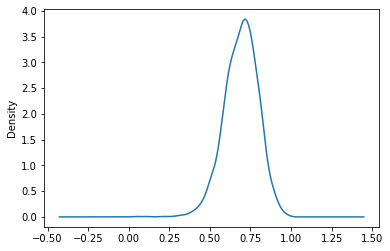

In [162]:
df['PORCENTAJE DE LOGRO'].plot.density()

In [166]:
print('Mean:', df['PORCENTAJE DE LOGRO'].mean())
print('Standard Deviation: ', df['PORCENTAJE DE LOGRO'].std())
print('Maximum:', df['PORCENTAJE DE LOGRO'].max())
print('Minimum:', df['PORCENTAJE DE LOGRO'].min())

Mean: 0.6917042042042035
Standard Deviation:  0.10459446553504753
Maximum: 0.9791666666666666
Minimum: 0.041666666666666664
